In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("dataset for bank loans.csv.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [7]:
df = df.drop(["Dependents","LoanAmount","Loan_Amount_Term","Credit_History", "Loan_ID"],axis=1)

In [8]:
df.isnull().sum()

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
df.loc[df["Gender"] == "Male", "Gender"] = 0
df.loc[df["Gender"] == "Female", "Gender"] = 1

In [10]:
df.loc[df["Married"] == "Yes", "Married"] = 0
df.loc[df["Married"] == "No", "Married"] = 1

In [11]:
df.loc[df["Education"] == "Graduate", "Education"] = 0
df.loc[df["Education"] == "Not Graduate", "Education"] = 1

In [12]:
df.loc[df["Self_Employed"] == "Yes", "Self_Employed"] = 0
df.loc[df["Self_Employed"] == "No", "Self_Employed"] = 1

In [13]:
df.loc[df["Property_Area"] == "Urban", "Property_Area"] = 0
df.loc[df["Property_Area"] == "Rural", "Property_Area"] = 1
df.loc[df["Property_Area"] == "Semiurban", "Property_Area"] = 2

In [14]:
df.loc[df["Loan_Status"] == "Y", "Loan_Status"] = 0
df.loc[df["Loan_Status"] == "N", "Loan_Status"] = 1

In [15]:
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Property_Area,Loan_Status
0,0,1,0,1,5849,0.0,0,0
1,0,0,0,1,4583,1508.0,1,1
2,0,0,0,0,3000,0.0,0,0
3,0,0,1,1,2583,2358.0,0,0
4,0,1,0,1,6000,0.0,0,0


In [16]:
description = df.describe()
print(description)

       ApplicantIncome  CoapplicantIncome
count       614.000000         614.000000
mean       5403.459283        1621.245798
std        6109.041673        2926.248369
min         150.000000           0.000000
25%        2877.500000           0.000000
50%        3812.500000        1188.500000
75%        5795.000000        2297.250000
max       81000.000000       41667.000000


In [17]:
import seaborn as sns

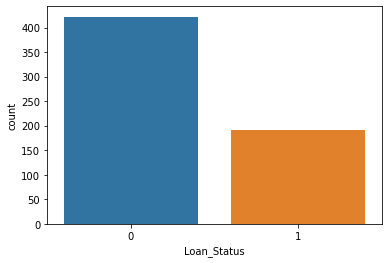

In [18]:
sns.countplot(x='Loan_Status',data=df)

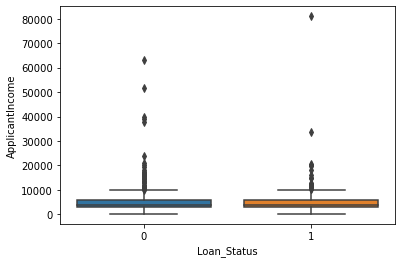

In [19]:
sns.boxplot(x='Loan_Status',y='ApplicantIncome',data=df)

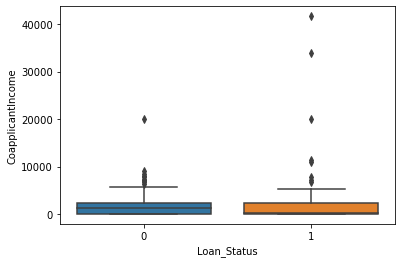

In [20]:
sns.boxplot(x='Loan_Status', y='CoapplicantIncome', data=df)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x = df.drop('Loan_Status',axis=1)
y = df['Loan_Status']

In [23]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
y

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=156)

In [25]:
from sklearn.preprocessing import StandardScaler


In [26]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
my_model = LogisticRegression()

In [29]:
result = my_model.fit(x_train, y_train)

In [30]:
prediction = result.predict(x_test)
prediction

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [31]:
from sklearn.metrics import mean_absolute_error,accuracy_score

In [32]:
mean_absolute_error(y_test, prediction)

0.34146341463414637

In [33]:
accuracy_score(y_test,prediction)

0.6585365853658537

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
from sklearn import metrics
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, prediction))

Confusion matrix:
[[80  2]
 [40  1]]


In [36]:
from sklearn import metrics
print('\**Classification Report:\n',metrics.classification_report(y_test,prediction))

\**Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.98      0.79        82
           1       0.33      0.02      0.05        41

    accuracy                           0.66       123
   macro avg       0.50      0.50      0.42       123
weighted avg       0.56      0.66      0.54       123



In [37]:
pred_new=list(result.predict([[1,0,1,0,3000,1508.0,1]]))
pred_new

[1]

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
my_model = DecisionTreeClassifier(random_state=0)
result = my_model.fit(x_train,y_train)

In [40]:
prediction = result.predict(x_test)
prediction

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1])

In [41]:
from sklearn.metrics import mean_absolute_error,accuracy_score

In [42]:
mean_absolute_error(y_test, prediction)

0.34146341463414637

In [43]:
accuracy_score(y_test,prediction)

0.6585365853658537

In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
from sklearn import metrics
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, prediction))

Confusion matrix:
[[65 17]
 [25 16]]


In [46]:
from sklearn import metrics
print('\**Classification Report:\n',metrics.classification_report(y_test,prediction))

\**Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.79      0.76        82
           1       0.48      0.39      0.43        41

    accuracy                           0.66       123
   macro avg       0.60      0.59      0.59       123
weighted avg       0.64      0.66      0.65       123



In [47]:
pred_new=list(result.predict([[1,0,1,0,3000,1508.0,1]]))
pred_new

[1]

In [48]:
from sklearn.ensemble import RandomForestClassifier
my_model = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 42)
result = my_model.fit(x_train, y_train)

In [49]:
prediction = result.predict(x_test)
prediction

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0])

In [50]:
from sklearn.metrics import mean_absolute_error,accuracy_score

In [51]:
mean_absolute_error(y_test, prediction)

0.37398373983739835

In [52]:
accuracy_score(y_test,prediction)

0.6260162601626016

In [53]:
from sklearn.metrics import confusion_matrix

In [54]:
from sklearn import metrics
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, prediction))

Confusion matrix:
[[68 14]
 [32  9]]


In [55]:
from sklearn import metrics
print('\**Classification Report:\n',metrics.classification_report(y_test,prediction))

\**Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.83      0.75        82
           1       0.39      0.22      0.28        41

    accuracy                           0.63       123
   macro avg       0.54      0.52      0.51       123
weighted avg       0.58      0.63      0.59       123



In [56]:
pred_new=list(result.predict([[1,0,1,0,3000,1508.0,1]]))
pred_new

[1]

In [57]:
from sklearn.neighbors import KNeighborsClassifier
my_model = KNeighborsClassifier(n_neighbors = 5)
result = my_model.fit(x_train,y_train)

In [58]:
prediction = result.predict(x_test)
prediction

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [59]:
from sklearn.metrics import mean_absolute_error,accuracy_score

In [60]:
mean_absolute_error(y_test, prediction)

0.43902439024390244

In [61]:
accuracy_score(y_test,prediction)

0.5609756097560976

In [62]:
from sklearn.metrics import confusion_matrix

In [63]:
from sklearn import metrics
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, prediction))

Confusion matrix:
[[64 18]
 [36  5]]


In [64]:
from sklearn import metrics
print('\**Classification Report:\n',metrics.classification_report(y_test,prediction))

\**Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.78      0.70        82
           1       0.22      0.12      0.16        41

    accuracy                           0.56       123
   macro avg       0.43      0.45      0.43       123
weighted avg       0.50      0.56      0.52       123



In [65]:
pred_new=list(result.predict([[1,0,1,0,3000,1508.0,1]]))
pred_new

[0]

In [66]:
from sklearn.svm import SVC
my_model = SVC(kernel = 'rbf', random_state = 0)
result = my_model.fit(x_train, y_train)

In [67]:
prediction = result.predict(x_test)
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [68]:
from sklearn.metrics import mean_absolute_error,accuracy_score

In [69]:
mean_absolute_error(y_test, prediction)

0.34146341463414637

In [70]:
accuracy_score(y_test,prediction)

0.6585365853658537

In [71]:
from sklearn.metrics import confusion_matrix

In [72]:
from sklearn import metrics
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, prediction))

Confusion matrix:
[[81  1]
 [41  0]]


In [73]:
from sklearn import metrics
print('\**Classification Report:\n',metrics.classification_report(y_test,prediction))

\**Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.99      0.79        82
           1       0.00      0.00      0.00        41

    accuracy                           0.66       123
   macro avg       0.33      0.49      0.40       123
weighted avg       0.44      0.66      0.53       123



In [74]:
pred_new=list(result.predict([[1,0,1,0,3000,1508.0,1]]))
pred_new

[0]